In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display
import math, time, random, datetime
import os
from math import sqrt
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
import xgboost as xbg
import re
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
regex = re.compile(r"\[|\]|<", re.IGNORECASE)


In [2]:
print(os.getcwd())

C:\Users\hp\Downloads


In [3]:
train = pd.read_csv('./tcd ml 2019-20 income prediction training (with labels).csv')
test = pd.read_csv('./tcd ml 2019-20 income prediction test (without labels).csv')
submission_example = pd.read_csv('./tcd ml 2019-20 income prediction submission file example (random solutions).csv')
submission_file = pd.read_csv('./tcd ml 2019-20 income prediction submission file.csv')
pd.set_option('display.max_columns', None)
pd.options.display.max_columns = None

In [4]:
train.head()

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
1,2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
2,3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
3,4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
4,5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217


In [5]:
test.head()

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
0,111994,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153,NaN
1,111995,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163,NaN
2,111996,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153,NaN
3,111997,1984.0,0,29.0,Uruguay,1494132,occupational therapist,No,0,Black,154,NaN
4,111998,2007.0,other,17.0,Serbia,120661,portfolio manager,No,0,Red,191,NaN


In [6]:
test['Gender'].value_counts()

male       28210
female     17743
other      17614
unknown     4346
0            455
Name: Gender, dtype: int64

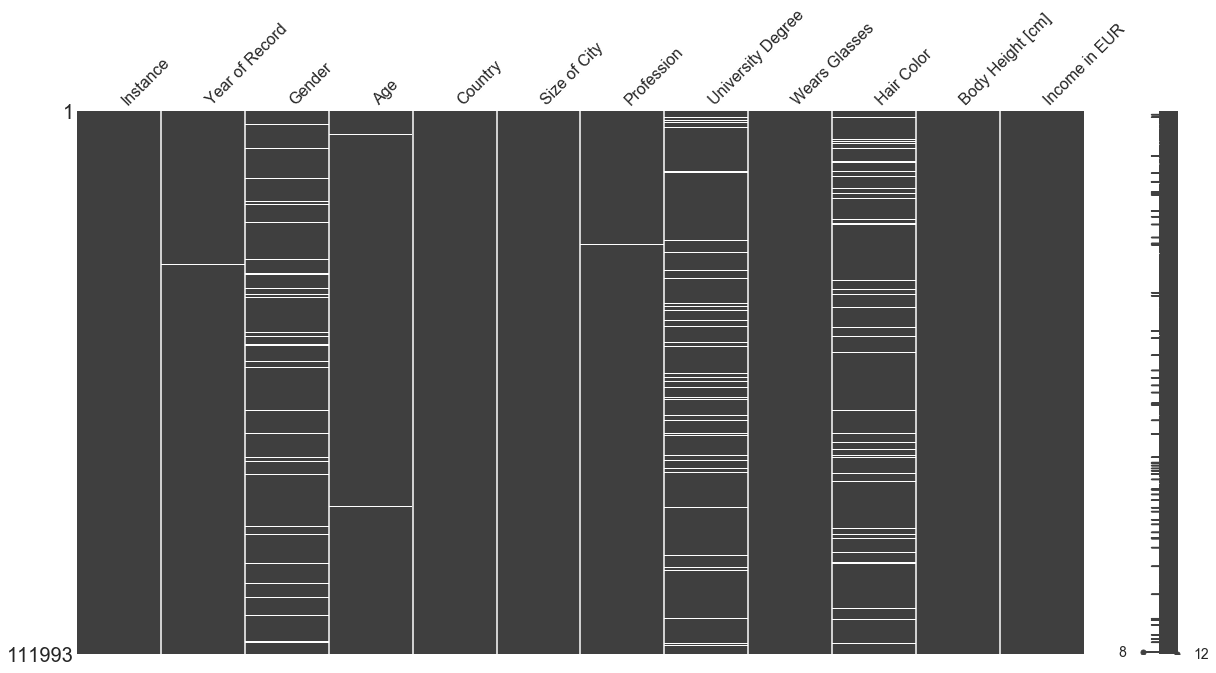

In [7]:
missingno.matrix(train, figsize = (20, 10))

In [8]:
def find_missing_no(df, columns):
    missing_val = {}
    print('Number of Missing at each column')
    length_df = len(df)
    for i in columns:
        total_val = df[i].value_counts().sum()
        missing_val[i] = length_df - total_val 
    print(missing_val)

find_missing_no(train, columns=train.columns)

Number of Missing at each column
{'Instance': 0, 'Year of Record': 441, 'Gender': 7432, 'Age': 494, 'Country': 0, 'Size of City': 0, 'Profession': 322, 'University Degree': 7370, 'Wears Glasses': 0, 'Hair Color': 7242, 'Body Height [cm]': 0, 'Income in EUR': 0}


In [9]:
print(train['Gender'].isnull().sum())
print(test['Gender'].isnull().sum())

7432
4862


In [10]:
print(train['Gender'].value_counts())

male       42758
female     27170
other      27060
unknown     6849
0            724
Name: Gender, dtype: int64


In [11]:
# train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
# test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

train['Gender'].fillna('unknown', inplace=True)
test['Gender'].fillna('unknown', inplace=True)

In [12]:
print(train['Year of Record'].isnull().sum())
print(test['Year of Record'].isnull().sum())

441
295


In [13]:
train['Year of Record'].fillna(train['Year of Record'].mode()[0],inplace=True)
test['Year of Record'].fillna(test['Year of Record'].mode()[0], inplace=True)

In [14]:
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

494
279


In [15]:
train['Age'].fillna(train['Age'].mode()[0],inplace=True)
test['Age'].fillna(test['Age'].mode()[0], inplace=True)

In [16]:
print(train['Profession'].isnull().sum())
print(test['Profession'].isnull().sum())

322
195


In [17]:
print(train['Profession'].value_counts())

pipefitter                               261
procedural justice coordinator           256
production support                       246
port marine engineer                     246
preplacement nurse practitioner          245
                                        ... 
account executive                          1
caster                                     1
apprentice inspector                       1
college aide                               1
assistant quality assurance associate      1
Name: Profession, Length: 1340, dtype: int64


In [17]:
train['Profession'].fillna(train['Profession'].mode()[0], inplace=True)
test['Profession'].fillna(test['Profession'].mode()[0], inplace=True)

In [18]:
print(train['University Degree'].isnull().sum())
print(test['University Degree'].isnull().sum())

7370
4857


In [19]:
print(train['University Degree'].value_counts())

Bachelor    43172
No          26992
Master      26941
PhD          6821
0             697
Name: University Degree, dtype: int64


In [20]:
train['University Degree'].fillna(train['University Degree'].mode()[0], inplace=True)
test['University Degree'].fillna(test['University Degree'].mode()[0], inplace=True)

In [22]:
print(train['Hair Color'].isnull().sum())
print(test['Hair Color'].isnull().sum())

7242
4916


In [23]:
print(train['Hair Color'].value_counts())

Black      42778
Blond      27248
Brown      27208
Red         6833
Unknown      655
0             29
Name: Hair Color, dtype: int64


In [24]:
train['Hair Color'].fillna('unknown', inplace=True)
test['Hair Color'].fillna('unknown', inplace=True)

In [25]:
find_missing_no(train, columns=train.columns)

Number of Missing at each column
{'Instance': 0, 'Year of Record': 0, 'Gender': 0, 'Age': 0, 'Country': 0, 'Size of City': 0, 'Profession': 0, 'University Degree': 0, 'Wears Glasses': 0, 'Hair Color': 0, 'Body Height [cm]': 0, 'Income in EUR': 0}


In [26]:
find_missing_no(test, columns=test.columns)

Number of Missing at each column
{'Instance': 0, 'Year of Record': 0, 'Gender': 0, 'Age': 0, 'Country': 0, 'Size of City': 0, 'Profession': 0, 'University Degree': 0, 'Wears Glasses': 0, 'Hair Color': 0, 'Body Height [cm]': 0, 'Income': 73230}


In [27]:
train['flag'] = 1
test['flag'] = 0

In [28]:
together_df = pd.DataFrame()

In [29]:
together_df.head()

""


In [30]:
together_df = pd.concat([train,test])

In [31]:
find_missing_no(together_df, columns=together_df.columns)

Number of Missing at each column
{'Age': 0, 'Body Height [cm]': 0, 'Country': 0, 'Gender': 0, 'Hair Color': 0, 'Income': 185223, 'Income in EUR': 73230, 'Instance': 0, 'Profession': 0, 'Size of City': 0, 'University Degree': 0, 'Wears Glasses': 0, 'Year of Record': 0, 'flag': 0}


In [34]:
together_df.drop(['Income', 'Instance', 'Hair Color' ], axis=1,inplace=True)

In [35]:
together_df.head()

,Age,Body Height [cm],Country,Gender,Income in EUR,Profession,Size of City,University Degree,Wears Glasses,Year of Record,flag
0,41.0,193,Belarus,0,61031.94416,steel workers,1239930,Bachelor,0,1997.0,1
1,41.0,186,Singapore,other,91001.32764,safe event coordinator,1603504,Master,0,1996.0,1
2,28.0,170,Norway,other,157982.17670,receivables/payables analyst,1298017,PhD,1,2018.0,1
3,33.0,171,Cuba,other,45993.75793,fleet assistant,751903,No,1,2006.0,1
4,46.0,188,United Arab Emirates,female,38022.16217,lead trainer,95389,0,0,2010.0,1


In [36]:
df_profession_one_hot_test = pd.get_dummies(together_df['Profession'],prefix='profession')
df_gender_one_hot_test = pd.get_dummies(together_df['Gender'],prefix='gender')
df_country_one_hot_test = pd.get_dummies(together_df['Country'],prefix='country')
df_ud_one_hot_test = pd.get_dummies(together_df['University Degree'],prefix='ud')

In [37]:
together_df = pd.concat([together_df,df_profession_one_hot_test,df_gender_one_hot_test, df_country_one_hot_test, df_ud_one_hot_test], axis=1)

In [38]:
together_df.head()

Age  Body Height [cm]               Country  Gender  Income in EUR  \
0  41.0               193               Belarus       0    61031.94416   
1  41.0               186             Singapore   other    91001.32764   
2  28.0               170                Norway   other   157982.17670   
3  33.0               171                  Cuba   other    45993.75793   
4  46.0               188  United Arab Emirates  female    38022.16217   

                     Profession  Size of City University Degree  \
0                 steel workers       1239930          Bachelor   
1        safe event coordinator       1603504            Master   
2  receivables/payables analyst       1298017               PhD   
3               fleet assistant        751903                No   
4                  lead trainer         95389                 0   

   Wears Glasses  Year of Record  flag  profession_.net developer  \
0              0          1997.0     1                          0   
1              0          1996.0     1                          0   
2              1          2018.0     1                          0   
3              1          2006.0     1                          0   
4              0          2010.0     1                          0   

   profession_.net software developer  profession_Accountant  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   0                      0   
4                                   0                      0   

   profession_Accounts Assistant  profession_Accounts Clerk  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   profession_Accounts Manager  profession_Accounts Staff  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   profession_Acoustic Engineer  profession_Actor  profession_Actress  \
0                             0                 0                   0   
1                             0                 0                   0   
2                             0                 0                   0   
3                             0                 0                   0   
4                             0                 0                   0   

   profession_Actuary  profession_Acupuncturist  profession_Adjustor  \
0                   0                         0                    0   
1                   0                         0                    0   
2                   0                         0                    0   
3                   0                         0                    0   
4                   0                         0                    0   

   profession_Administration Assistant  profession_Administration Clerk  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   

   profession_Administration Manager  profession_Administration Staff  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                

In [39]:
together_df.drop(['Country','Gender','Profession','University Degree'],axis=1,inplace=True)

In [40]:
together_df.head()

,Age,Body Height [cm],Income in EUR,Size of City,Wears Glasses,Year of Record,flag,profession_.net developer,profession_.net software developer,profession_Accountant,profession_Accounts Assistant,profession_Accounts Clerk,profession_Accounts Manager,profession_Accounts Staff,profession_Acoustic Engineer,profession_Actor,profession_Actress,profession_Actuary,profession_Acupuncturist,profession_Adjustor,profession_Administration Assistant,profession_Administration Clerk,profession_Administration Manager,profession_Administration Staff,profession_Administrator,profession_Advertising Agent,profession_Advertising Assistant,profession_Advertising Clerk,profession_Advertising Contractor,profession_Advertising Executive,profession_Advertising Manager,profession_Advertising Staff,profession_Aerial Erector,profession_Aerobic Instructor,profession_Aeronautical Engineer,profession_Agent,profession_Air Traffic Controller,profession_Aircraft Designer,profession_Aircraft Engineer,profession_Aircraft Maintenance Engineer,profession_Aircraft Surface Finisher,profession_Airman,profession_Airport Controller,profession_Airport Manager,profession_Almoner,profession_Ambulance Controller,profession_Ambulance Crew,profession_Ambulance Driver,profession_Amusement Arcade Worker,profession_Anaesthetist,profession_Analyst,profession_Analytical Chemist,profession_Animal Breeder,profession_Anthropologist,profession_Antique Dealer,profession_Applications Engineer,profession_Applications Programmer,profession_Arbitrator,profession_Arborist,profession_Archaeologist,profession_Architect,profession_Archivist,profession_Area Manager,profession_Armourer,profession_Aromatherapist,profession_Art Critic,profession_Art Dealer,profession_Art Historian,profession_Art Restorer,profession_Artexer,profession_Artist,profession_Arts,profession_Assembly Worker,profession_Assessor,profession_Assistant,profession_Assistant Caretaker,profession_Assistant Cook,profession_Assistant Manager,profession_Assistant Nurse,profession_Assistant Teacher,profession_Astrologer,profession_Astronomer,profession_Attendant,profession_Au Pair,profession_Auction Worker,profession_Auctioneer,profession_Audiologist,profession_Audit Clerk,profession_Audit Manager,profession_Auditor,profession_Auto Electrician,profession_Auxiliary Nurse,profession_Bacon Curer,profession_Baggage Handler,profession_Bailiff,profession_Baker,profession_Bakery Assistant,profession_Bakery Manager,profession_Bakery Operator,profession_Balloonist,profession_Bank Clerk,profession_Bank Manager,profession_Bank Messenger,profession_Baptist Minister,profession_Bar Manager,profession_Bar Steward,profession_Barber,profession_Barmaid,profession_Barman,profession_Barrister,profession_Beautician,profession_Beauty Therapist,profession_Betting Shop,profession_Bill Poster,profession_Bingo Caller,profession_Biochemist,profession_Biologist,profession_Blacksmith,profession_Blind Assembler,profession_Blind Fitter,profession_Blinds Installer,profession_Boat Builder,profession_Body Fitter,profession_Bodyguard,profession_Bodyshop,profession_Book Binder,profession_Book Seller,profession_Book-Keeper,profession_Booking Agent,profession_Booking Clerk,profession_Bookmaker,profession_Botanist,profession_Branch Manager,profession_Breeder,profession_Brewer,profession_Brewery Manager,profession_Brewery Worker,profession_Bricklayer,profession_Broadcaster,profession_Builder,profession_Builders Labourer,profession_Building Advisor,profession_Building Control,profession_HVAC mechanic,profession_Occupations,profession_accessibility outreach coordinator,profession_accessibility program manager,profession_account executive,profession_account manager,profession_accountable manager,profession_accountable project manager,profession_accountant,profession_accounting investment analyst,profession_actor,profession_actuary,profession_admin engineer,profession_administrative aide,profession_administrative assistant,profession_administrative associate to the executive d

In [41]:
train_df = together_df[together_df['flag'] == 1]
test_df = together_df[together_df['flag'] == 0]

In [42]:
print(train_df.shape)
print(test_df.shape)

(111993, 1534)
(73230, 1534)


In [43]:
train_df.head()

,Age,Body Height [cm],Income in EUR,Size of City,Wears Glasses,Year of Record,flag,profession_.net developer,profession_.net software developer,profession_Accountant,profession_Accounts Assistant,profession_Accounts Clerk,profession_Accounts Manager,profession_Accounts Staff,profession_Acoustic Engineer,profession_Actor,profession_Actress,profession_Actuary,profession_Acupuncturist,profession_Adjustor,profession_Administration Assistant,profession_Administration Clerk,profession_Administration Manager,profession_Administration Staff,profession_Administrator,profession_Advertising Agent,profession_Advertising Assistant,profession_Advertising Clerk,profession_Advertising Contractor,profession_Advertising Executive,profession_Advertising Manager,profession_Advertising Staff,profession_Aerial Erector,profession_Aerobic Instructor,profession_Aeronautical Engineer,profession_Agent,profession_Air Traffic Controller,profession_Aircraft Designer,profession_Aircraft Engineer,profession_Aircraft Maintenance Engineer,profession_Aircraft Surface Finisher,profession_Airman,profession_Airport Controller,profession_Airport Manager,profession_Almoner,profession_Ambulance Controller,profession_Ambulance Crew,profession_Ambulance Driver,profession_Amusement Arcade Worker,profession_Anaesthetist,profession_Analyst,profession_Analytical Chemist,profession_Animal Breeder,profession_Anthropologist,profession_Antique Dealer,profession_Applications Engineer,profession_Applications Programmer,profession_Arbitrator,profession_Arborist,profession_Archaeologist,profession_Architect,profession_Archivist,profession_Area Manager,profession_Armourer,profession_Aromatherapist,profession_Art Critic,profession_Art Dealer,profession_Art Historian,profession_Art Restorer,profession_Artexer,profession_Artist,profession_Arts,profession_Assembly Worker,profession_Assessor,profession_Assistant,profession_Assistant Caretaker,profession_Assistant Cook,profession_Assistant Manager,profession_Assistant Nurse,profession_Assistant Teacher,profession_Astrologer,profession_Astronomer,profession_Attendant,profession_Au Pair,profession_Auction Worker,profession_Auctioneer,profession_Audiologist,profession_Audit Clerk,profession_Audit Manager,profession_Auditor,profession_Auto Electrician,profession_Auxiliary Nurse,profession_Bacon Curer,profession_Baggage Handler,profession_Bailiff,profession_Baker,profession_Bakery Assistant,profession_Bakery Manager,profession_Bakery Operator,profession_Balloonist,profession_Bank Clerk,profession_Bank Manager,profession_Bank Messenger,profession_Baptist Minister,profession_Bar Manager,profession_Bar Steward,profession_Barber,profession_Barmaid,profession_Barman,profession_Barrister,profession_Beautician,profession_Beauty Therapist,profession_Betting Shop,profession_Bill Poster,profession_Bingo Caller,profession_Biochemist,profession_Biologist,profession_Blacksmith,profession_Blind Assembler,profession_Blind Fitter,profession_Blinds Installer,profession_Boat Builder,profession_Body Fitter,profession_Bodyguard,profession_Bodyshop,profession_Book Binder,profession_Book Seller,profession_Book-Keeper,profession_Booking Agent,profession_Booking Clerk,profession_Bookmaker,profession_Botanist,profession_Branch Manager,profession_Breeder,profession_Brewer,profession_Brewery Manager,profession_Brewery Worker,profession_Bricklayer,profession_Broadcaster,profession_Builder,profession_Builders Labourer,profession_Building Advisor,profession_Building Control,profession_HVAC mechanic,profession_Occupations,profession_accessibility outreach coordinator,profession_accessibility program manager,profession_account executive,profession_account manager,profession_accountable manager,profession_accountable project manager,profession_accountant,profession_accounting investment analyst,profession_actor,profession_actuary,profession_admin engineer,profession_administrative aide,profession_administrative assistant,profession_administrative associate to the executive d

In [44]:
train_df.drop(['flag'],axis=1,inplace=True)

In [42]:
train_df.set_index('Instance', inplace=True)

In [45]:
test_df.drop(['flag'],axis=1,inplace=True)

In [45]:
test_df.set_index('Instance',inplace=True)

KeyError: "None of ['Instance'] are in the columns"

In [46]:
test_df.drop(['Income in EUR'],axis=1,inplace=True)

In [47]:
train_df.shape

(111993, 1533)

In [48]:
test_df.shape

(73230, 1532)

In [49]:
test_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test_df.columns.values]

In [50]:
train_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train_df.columns.values]

In [51]:
X_train = train_df.drop('Income in EUR', axis=1) # data
y_train = train_df['Income in EUR'] # labels

In [52]:
find_missing_no(X_train, columns=X_train.columns)

Number of Missing at each column
{'Age': 0, 'Body Height _cm_': 0, 'Size of City': 0, 'Wears Glasses': 0, 'Year of Record': 0, 'profession_.net developer': 0, 'profession_.net software developer': 0, 'profession_Accountant': 0, 'profession_Accounts Assistant': 0, 'profession_Accounts Clerk': 0, 'profession_Accounts Manager': 0, 'profession_Accounts Staff': 0, 'profession_Acoustic Engineer': 0, 'profession_Actor': 0, 'profession_Actress': 0, 'profession_Actuary': 0, 'profession_Acupuncturist': 0, 'profession_Adjustor': 0, 'profession_Administration Assistant': 0, 'profession_Administration Clerk': 0, 'profession_Administration Manager': 0, 'profession_Administration Staff': 0, 'profession_Administrator': 0, 'profession_Advertising Agent': 0, 'profession_Advertising Assistant': 0, 'profession_Advertising Clerk': 0, 'profession_Advertising Contractor': 0, 'profession_Advertising Executive': 0, 'profession_Advertising Manager': 0, 'profession_Advertising Staff': 0, 'profession_Aerial Erect

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [54]:
X_train.shape

(83994, 1532)

In [59]:
model = xbg.XGBClassifier()
model.fit(X_train, y_train)

OSError: [WinError -529697949] Windows Error 0xe06d7363

In [65]:
regressor = GradientBoostingRegressor(
    max_depth=4,
    n_estimators=1500,
    learning_rate=0.05
)
regressor.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
print(best_n_estimators)
best_regressor = GradientBoostingRegressor(
    max_depth=4,
    n_estimators=best_n_estimators,
    learning_rate=0.05
)
best_regressor.fit(X_train, y_train)

1499


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1499,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
start_time = time.time()
regr_rf = RandomForestRegressor(n_estimators = 150, random_state = 0)
model_rf = regr_rf.fit(new_df2, y_train)
acc = (model_rf.score(new_df, y_train))
print(time.time() - start_time)

14490.241863250732


In [ ]:
regr = LinearRegression()
model = regr.fit(new_df, y_train) 
acc = (model.score(new_df, y_train))

In [64]:
new_df.shape

(111993, 1539)

In [75]:
new_df_test.shape

(73230, 1539)

In [74]:
new_df_test.set_index('Instance',inplace=True)

In [69]:
print(acc)

0.9609491653649556


In [76]:
predictions = model_rf.predict(test_df)

In [77]:
predictions = model_rf.predict(new_df_test)

In [66]:
y_predictions_ = best_regressor.predict(new_df_test)

In [68]:
y_predictions = best_regressor.predict(X_test)

In [109]:
sqrt(mean_squared_error(y_test,predictions[0:27999]))

197070.32852116248

In [69]:
sqrt(mean_squared_error(y_test,y_predictions))

79549.72823871794

In [106]:
y_predictions_[:20]

array([ 24633.58915226,  -4536.41260785,  76281.40571133, 142931.64243248,
         6235.63836097, 108485.89648844, 100977.99678144,  66912.09593368,
        47641.67336134, 124256.66266458, -18407.75973524, 162386.83582405,
        24182.03289006, 102651.12919226, 260628.64221907,  78029.75249896,
        49026.65899642,  27186.97461547, 159970.05030718,  33209.32678421])

In [78]:
predictions[:20]

array([ 49607.61015453,  20164.63770043,  42597.32284553, 124813.80361107,
         9995.20640549,  76078.05873533, 110286.71845987,  49931.03070327,
        32315.21230027, 127585.10355627,  10808.54252861, 121250.40245733,
        31155.7004616 ,  99524.0746912 , 240111.40318787,  52922.42589967,
        35592.18475033,  30329.39851213,  20958.26827885,  14156.91021793])

In [79]:
Submissions = pd.DataFrame()
Submissions['Instance'] = submission_file['Instance']
Submissions['Income'] = predictions

In [110]:
Submissions = pd.DataFrame()
Submissions['Instance'] = submission_file['Instance']
Submissions['Income'] = y_predictions_

In [111]:
Submissions.to_csv('./gg5.csv',index = False)